# 1.. Introduction to business problem 

# 2.. What is Ollama & its Setup ?

In [ ]:
'''

Ollama is basically a tool that lets you download & run LLM models (like Gemma, Llama, Mistral, etc.) 
locally on your laptop/PC — just like you run Python code.

✅ What is Ollama?
Ollama = Local LLM Runner



✅ Why Ollama is used?
    Benefits:

✅ Works offline (after model download)
✅ No API cost
✅ Fast response (if system strong)
✅ Best for building GenAI projects locally


'''

In [ ]:
## On ollama app , if u are not getting LLama to download !
## So Go to command prompt :
## ollama pull llama3.2:1b ~1.3 GB


In [ ]:
'''


model="gemma3:4b" means:

👉 You are using the Gemma 3 Large language model of Google..
4B : 4 Billion parameters


Why it matters?

4B model = fast + low RAM requirement ✅
But bigger models (like 12B / 27B) usually give better reasoning/accuracy ✅


'''

# 3.. how to read data from Feather !
        Feather is a binary file format that is used for storing data ..
        
        When we say Feather is a “binary file format”, it simply means:
        ✅ Data is saved in 0s and 1s (machine-readable form), not as human-readable text like CSV...
        
        
        Why binary format is used?
        Because Binary format is much faster and efficient than CSV..
        
        ✅ Benefits of Feather:

        ⚡ Very fast read/write
        📦 Smaller file size than CSV
        🧠 Keeps data types perfectly (int, float, datetime etc.)
            Great for data science / ML pipelines

In [ ]:
'''
(Traditional Analytics) : 

Python does :
    Load Data
    Show rows & columns
    Compute descriptive statistics ( like mean , median , variance , std dev of a data)
    
    
Analyst manually :
    Explain what the dataset is about
    Explain columns & metrics
    Interpret descriptive statistics
    Decide what type of analysis is possible 
    
📌 Problem : This step is manual, time-consuming, and dependent on Data analyst experience




🚀 Now :
Python does :
    Load Data
    Show rows & columns
    Compute descriptive statistics
    

Gemma acts like as a Data Analyst :
    Explain what the dataset represents
    Explain columns & metrics
    Interpret descriptive statistics in simple lang
    Decide what type of analysis is possible 





'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### In order to work with feather files , do install pyarrow package ..
## !pip install pyarrow


In [3]:
# !pip install pyarrow

In [4]:
all_data = pd.read_feather(r"R:\All_Datasets\4.. Sales Analysis/Sales_data.ftr")

In [5]:
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
'''

The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost ,
purchase address, etc..

'''

'\n\nThe data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost ,\npurchase address, etc\n\n'

In [7]:
from langchain_ollama import OllamaLLM

In [8]:
llm = OllamaLLM(
    model="gemma3:4b",
    base_url="http://localhost:11434"
)


## base_url="http://localhost:11434" : Talk to this "gemma3:4b" model via this local server”
## bcz Ollama server is running on your own machine having default API port (1134)

In [9]:
prompt = f"""
You are a senior retail data analyst.

Dataset overview:
• Columns: {list(all_data.columns)}
• Rows: {all_data.shape[0]}

Explain:
1. What kind of dataset this is
2. What business questions can be answered
3. Any limitations

Explain in simple language.
"""



In [10]:
print(llm.invoke(prompt))

## takes 20-30 sec !

Okay, here's an explanation of the dataset, geared toward a business perspective, as a senior retail data analyst would provide:

**1. What Kind of Dataset This Is**

This is a sales transaction dataset. Think of it like a detailed record of every single order we’ve fulfilled. Each row represents a single order we’ve taken from a customer.  We have information about:

*   **Order ID:** A unique number for each order.
*   **Product:** What the customer bought (e.g., "Red T-Shirt," "Coffee Maker").
*   **Quantity Ordered:** How many of that product the customer bought.
*   **Price Each:** How much each individual item cost.
*   **Order Date:** When the order was placed.
*   **Purchase Address:** Where the customer was located when they ordered.

Essentially, it’s a snapshot of our sales activity over time, linked to the products and where customers are ordering from.


**2. What Business Questions Can Be Answered**

This dataset is *gold* for understanding our business! Here are some key

# 4 : Data Cleaning

In [ ]:
'''

🐍 Python does

Missing values
Duplicates
Type conversions


🧠 Gemini reviews preprocessing


'''

##### Data cleaning and formatting

In [11]:
all_data.isnull().sum() ## checking out total missing values we have 

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
### since there 545 observations where entire row have missing value , u can drop these 545 rows..

all_data = all_data.dropna(how="all")

In [13]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [17]:
### check whether u have duplicate rows or not !

In [14]:
all_data.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [15]:
all_data[all_data.duplicated()] ## total 618 duplicate rows ..

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [16]:
all_data = all_data.drop_duplicates() ## Dropping all the duplicate rows ..

In [17]:
all_data.shape

(185687, 6)

In [18]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
prompt = f"""
You are a senior data analyst reviewing preprocessing steps..

Cleaning summary:
• Missing values: {all_data.isnull().sum().to_dict()}
• Duplicate rows removed
• Data types fixed

Answer:
1. Is the data ready for analysis?
2. Any risks or improvements?

Give a short summary.
"""


In [20]:
print(llm.invoke(prompt))

Okay, here’s my assessment based on the cleaning summary:

**Summary:**

The data appears to be in a reasonably good state for analysis, having addressed missing values and duplicates. However, a thorough data quality check is still recommended.

**Answers to your questions:**

1.  **Is the data ready for analysis?**  Not fully. While the most critical issues (missing values and duplicates) have been addressed, the data type fixes are essential to ensure accurate calculations and modeling. Further investigation into the data types themselves is needed to confirm they are appropriate for the intended analysis.

2.  **Any risks or improvements?**
    *   **Risk:**  The summary doesn’t provide detail on *how* missing values were handled.  Imputation methods could introduce bias.
    *   **Improvement:** A more detailed data quality report should include:
        *   Specific imputation methods used (if any) and their rationale.
        *   Confirmation of correct data types for each colum

In [ ]:
'''

Short summary of all 4 points (concise):

The data is partially ready, but zero values likely represent missing data and need validation.
Treating missing values as zero can bias results and mislead analysis.
Zeros should be investigated and properly handled (imputation or alternative methods).
Clear documentation of data-cleaning decisions is essential for reliable analysis.


ie Gemma is alerting us regarding the analysis we are thinking for or It is flagging risks, assumptions!

'''

## 5.. Which is the best month for sale ?
    Lets first understand what this term 'best' is all about : if any month has maximum sales, we will consider that as best

In [1]:
'''
In EDA (Exploratory Data Analysis) , 
Python generates “numbers + charts” to solve task ie by using 
    Groupby / aggregation
    Calculate totals, averages
    Monthly sales trend
    Top products / categories
    Charts (barplot, lineplot, heatmap)
    Correlation / distribution


🧠 Gemini / GenAI does (EDA analyst part)
    Explains what patterns mean
    Writes conclusions in simple English
    Suggests next analysis
    Answers business questions:





📌 EDA = Python generates “numbers + charts” or Python finds patterns, GenAI explains patterns like a business analyst.


'''

'\nIn EDA (Exploratory Data Analysis) , \nPython generates “numbers + charts” to solve task ie by using \n\n\n\nand insight human / GenAI nikalta hai.\n\n\n\n\n\n\n📌 EDA = Python finds patterns, GenAI explains patterns like a business analyst.\n\n\n'

In [21]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


##### add month col

In [26]:
all_data['Month'] = all_data['Order Date'].str.split('/').str[0] ## extracting month from "Order Date"

In [27]:
all_data['Month'].dtype

dtype('O')

In [28]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [29]:
all_data['Month'].astype(int) ## convert dat-type into integer ..

ValueError: invalid literal for int() with base 10: 'Order Date'

In [30]:
all_data['Month'].unique() ## checking unique months 

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [31]:
filter1 = all_data['Month'] == 'Order Date'

In [32]:
all_data[~filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [33]:
all_data = all_data[~filter1] ## excluding all those rows which have entry as "Order Date" in month feature ..

In [34]:
all_data.shape

(185686, 7)

In [35]:
## use warnings package to get rid of any warnings ..

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [36]:
all_data['Month'] = all_data['Month'].astype(int)

In [37]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [38]:
## lets fix data-types !

all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [39]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [40]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] ## creating sales feature

In [41]:
all_data['sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: sales, Length: 185686, dtype: float64

In [42]:
monthly_sales = all_data.groupby(['Month'])['sales'].sum()
monthly_sales

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

In [43]:
prompt = f"""
Monthly sales summary:
{monthly_sales.to_dict()}

Explain:
1. Which month performs best
2. Possible business reasons
3. Seasonal patterns

Do NOT repeat numbers.
Explain like a business analyst.
"""



In [44]:
print(llm.invoke(prompt))

## takes 30 sec 

Okay, let's analyze this monthly sales data to identify key trends and insights.

**1. Best Performing Month:**

December demonstrates the strongest sales performance, achieving a total revenue of approximately four million six hundred eight thousand two hundred ninety-five dollars. This significantly outperforms all other months within the dataset.

**2. Possible Business Reasons:**

Several factors could be contributing to December’s success:

*   **Holiday Season:** December is, without a doubt, the peak of the holiday shopping season.  Increased consumer spending driven by gift-giving occasions like Christmas and New Year's dramatically boosts sales across many retail sectors.
*   **Promotional Activity:** The company likely ran targeted promotional campaigns specifically for the holiday period – likely offering discounts, bundles, or limited-edition products.
*   **Increased Marketing Spend:** It’s probable that marketing and advertising budgets were increased during December to c

In [ ]:
## all_data.groupby(['Month'])['sales'].sum().plot(kind='bar')

In [ ]:
'''

->> y-axis scale : 1e^6

E stands for exponential , in short it is *10^

So, 1e6 or 1e^6 OR 1 exponent 6 is the same as 1*10^6 which is same as 1,000,000


Inference : December is the best month of sales ..

'''

## 6.. Which city has max order ? 

In [45]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [46]:
all_data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [47]:
all_data['Purchase Address'][0].split(',')[1] ## extracting city from "Purchase Address"

' Dallas'

In [48]:
all_data['city'] = all_data['Purchase Address'].str.split(',').str.get(1)

In [49]:
all_data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

In [50]:
city_orders = pd.value_counts(all_data['city']) ## frequency table..
city_orders

city
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

In [51]:
prompt = f"""
City-wise order distribution:
{city_orders.head(5).to_dict()}

Explain:
1. Why these cities dominate orders
2. Urban demand patterns
3. Marketing implications
"""




In [52]:
print(llm.invoke(prompt))


## takes 30-40 sec !

Okay, let's break down this city-wise order distribution data and explore the reasons behind it, urban demand patterns, and the marketing implications.

**1. Why These Cities Dominate Orders**

The distribution you’ve provided – ‘ San Francisco’ (44662), ‘ Los Angeles’ (29564), ‘ New York City’ (24847), ‘ Boston’ (19901), ‘ Atlanta’ (14863) – clearly demonstrates that these cities are *significantly* higher in order volume than others. There isn't a single, simple answer, but here’s a breakdown of contributing factors:

* **Large Population Size:**  This is the most obvious driver. New York City, Los Angeles, and San Francisco are the most populous cities in the United States.  A large population inherently generates a higher volume of orders.
* **High Density & Urban Lifestyle:** These cities are characterized by high population density, leading to more frequent consumer activity. People live, work, and shop in the same areas, increasing the opportunity for orders.
* **Strong Economie

<AxesSubplot:ylabel='city'>

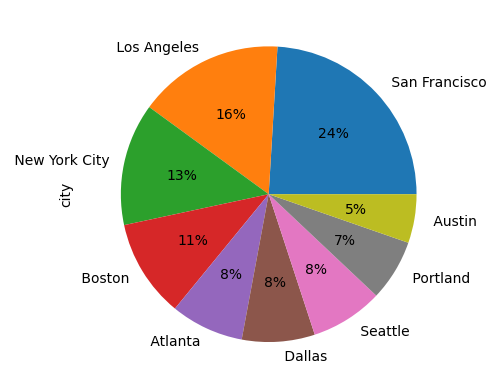

In [58]:
## pd.value_counts(all_data['city']).plot(kind='pie' , autopct = '%1.0f%%') ## Pandas pie chart..

In [ ]:
'''

Inference : New York , Los Angeles , San Francisco are the Top 3 cities which has max order 


'''

## 7.. What product sold the most &  Why?
        Top Product & Price–Demand Relationship

In [ ]:
'''

Here 📌 LLM Replaces manual twin-axis explanation

'''

In [53]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'city'],
      dtype='object')

In [54]:
product_summary = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum' , 'Price Each':'mean'})

In [56]:
product_summary = product_summary.reset_index()

In [57]:
product_summary

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [58]:
prompt = f"""
Top-selling product summary :
{product_summary.sort_values('Quantity Ordered', ascending=False).head(5).to_dict(orient='records')}

Explain :
1. Why cheaper products sell more
2. Price vs quantity relationship
3. Business takeaway
"""


In [93]:
print(llm.invoke(prompt))

## takes 30-40 sec..

Okay, let’s break down this product summary and answer your questions.

**1. Why Cheaper Products Sell More**

Based on this data, the top-selling products are the AAA Batteries (4-pack) and AA Batteries (4-pack).  These are significantly cheaper than the USB-C charging cable and Lightning charging cable. Here's why this happens:

* **High Volume Demand:** Cheaper items often tap into a broader market.  Batteries are a consumable – everyone needs them for various devices.  Because they’re relatively inexpensive, people are more willing to buy larger quantities when they run out.
* **Accessibility & Impulse Purchases:** Lower prices make them more accessible to a wider range of consumers, including budget-conscious shoppers. They can also be impulse buys – someone might grab a pack of AA batteries while they're already at the store.
* **Replacement Needs:** Batteries are frequently replaced as they die. This creates a consistent, ongoing demand regardless of broader economic conditions.